# Importing libraries

In [2]:
!pip install tensorflow

In [10]:
import re
import nltk
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, LSTM, Embedding, Bidirectional

#nltk.download("stopwords")
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words("english"))
lemmatizer= WordNetLemmatizer()

# Modelling
from sklearn.model_selection import train_test_split,KFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.svm import SVC

#Lime
from lime import lime_text
from lime.lime_text import LimeTextExplainer
from lime.lime_text import IndexedString,IndexedCharacters
from lime.lime_base import LimeBase
from lime.lime_text import explanation
sns.set(font_scale=1.3)
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Byte\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Byte\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [11]:
# Read datasets
df_train = pd.read_csv('processed_data/train.csv')
df_val = pd.read_csv('processed_data/val.csv')
df_test = pd.read_csv('processed_data/test.csv')
df_test2=pd.read_csv('emotion_dataset_raw.csv')

In [12]:
#print first 5 rows
df_train.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


## Train dataset

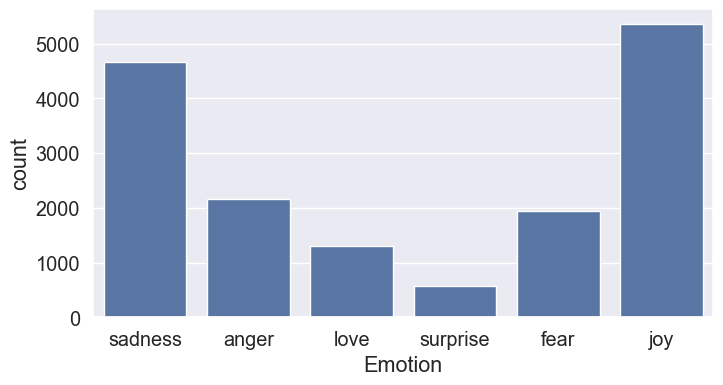

In [202]:
plt.figure(figsize=(8,4))
sns.countplot(x='Emotion', data=df_train);

In [203]:
#print the number of duplicated values
df_train.duplicated().sum()

1

In [204]:
#removing duplicated values
index = df_train[df_train.duplicated() == True].index
df_train.drop(index, axis = 0, inplace = True)
df_train.reset_index(inplace=True, drop = True)

In [205]:
df_train[df_train['Text'].duplicated() == True]

,Text,Emotion
5067,i feel on the verge of tears from weariness i ...,joy
6133,i still feel a craving for sweet food,love
6563,i tend to stop breathing when i m feeling stre...,anger
7623,i was intensely conscious of how much cash i h...,sadness
7685,im still not sure why reilly feels the need to...,surprise
8246,i am not amazing or great at photography but i...,love
9596,ive also made it with both sugar measurements ...,joy
9687,i had to choose the sleek and smoother feel of...,joy
9769,i often find myself feeling assaulted by a mul...,sadness
9786,i feel im being generous with that statement,joy


In [206]:
#print some of those rows to check
df_train[df_train['Text'] == df_train.iloc[7623]['Text']]

,Text,Emotion
1625,i was intensely conscious of how much cash i h...,anger
7623,i was intensely conscious of how much cash i h...,sadness


In [207]:
#removing duplicated text
index = df_train[df_train['Text'].duplicated() == True].index
df_train.drop(index, axis = 0, inplace = True)
df_train.reset_index(inplace=True, drop = True)

## Test dataset

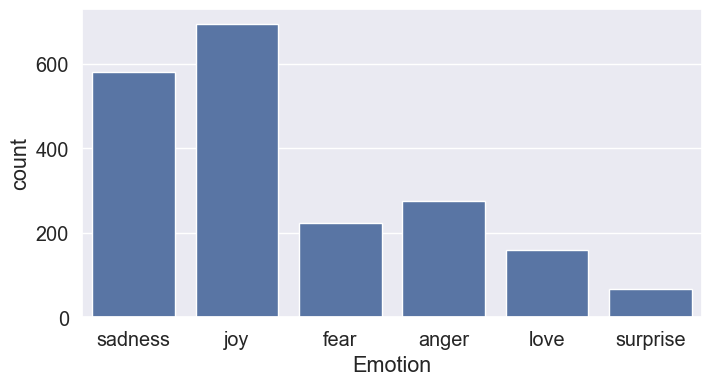

In [208]:
plt.figure(figsize=(8,4))
sns.countplot(x='Emotion', data=df_test);



## Validation dataset

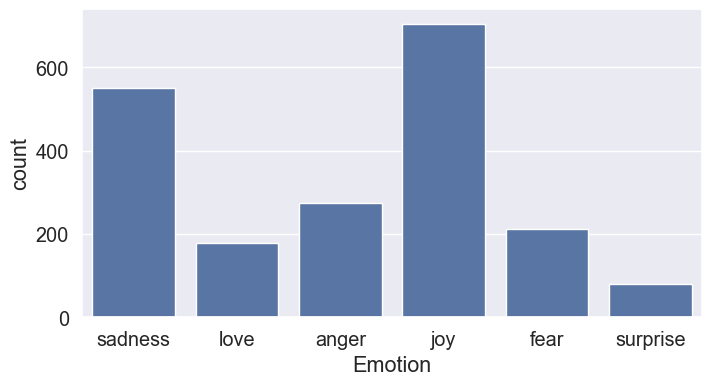

In [209]:
plt.figure(figsize=(8,4))
sns.countplot(x='Emotion', data=df_val);

## Cleaning

In [13]:
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Byte\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
def lemmatization(text):
    lemmatizer= WordNetLemmatizer()

    text = text.split()

    text=[lemmatizer.lemmatize(y) for y in text]

    return " " .join(text)

def remove_stop_words(text):

    Text=[i for i in str(text).split() if i not in stop_words]
    return " ".join(Text)

def Removing_numbers(text):
    text=''.join([i for i in text if not i.isdigit()])
    return text

def lower_case(text):

    text = text.split()

    text=[y.lower() for y in text]

    return " " .join(text)

def Removing_punctuations(text):
    ## Remove punctuations
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,،-./:;<=>؟?@[\]^_{|}~"""), ' ', text)
    text = text.replace('؛',"", )

    ## remove extra whitespace
    text = re.sub('\s+', ' ', text)
    text =  " ".join(text.split())
    return text.strip()

def Removing_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

def remove_small_sentences(df):
    for i in range(len(df)):
        if len(df.text.iloc[i].split()) < 3:
            df.text.iloc[i] = np.nan

def normalize_text(df):
    df.Text=df.Text.apply(lambda text : lower_case(text))
    df.Text=df.Text.apply(lambda text : remove_stop_words(text))
    df.Text=df.Text.apply(lambda text : Removing_numbers(text))
    df.Text=df.Text.apply(lambda text : Removing_punctuations(text))
    df.Text=df.Text.apply(lambda text : Removing_urls(text))
    df.Text=df.Text.apply(lambda text : lemmatization(text))
    return df

def normalized_sentence(sentence):
    sentence= lower_case(sentence)
    sentence= remove_stop_words(sentence)
    sentence= Removing_numbers(sentence)
    sentence= Removing_punctuations(sentence)
    sentence= Removing_urls(sentence)
    sentence= lemmatization(sentence)
    return sentence

In [15]:
normalized_sentence("my name is fatemeh farsijani my email address is 1267889@gmail.com @Faphnut  and my phone number is 092983")


'name fatemeh farsijani email address gmail com faphnut phone number'

In [16]:
df_train= normalize_text(df_train)
df_test= normalize_text(df_test)
df_val= normalize_text(df_val)
df_test2= normalize_text(df_test2)


## Preprocessing

In [17]:
#Splitting the text from the labels
X_train = df_train['Text']
y_train = df_train['Emotion']

X_test = df_test['Text']
y_test = df_test['Emotion']

X_val = df_val['Text']
y_val = df_val['Emotion']


In [18]:
# Encode labels
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
y_val = le.transform(y_val)

In [19]:
#Convert the class vector (integers) to binary class matrix
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

## Tokenizing

In [20]:
tokenizer = Tokenizer(oov_token='UNK')
tokenizer.fit_on_texts(pd.concat([X_train, X_test], axis=0))

In [23]:
#convert the list of indexes into a matrix of ones and zeros (BOW)
tokenizer.texts_to_matrix(X_train[0].split())

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
#the sentence contains three words and the size of the vocabulary is 14325
tokenizer.texts_to_matrix(X_train[0].split()).shape

(3, 14325)

In [21]:
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)
sequences_val = tokenizer.texts_to_sequences(X_val)


## Padding


In [22]:
maxlen = max([len(t) for t in df_train['Text']])
maxlen

229

In [23]:
X_train = pad_sequences(sequences_train, maxlen=229, truncating='pre')
X_test = pad_sequences(sequences_test, maxlen=229, truncating='pre')
X_val = pad_sequences(sequences_val, maxlen=229, truncating='pre')
vocabSize=len(tokenizer.index_word)+1

In [24]:

path_to_glove_file = 'glove.6B.200d.txt'
num_tokens = vocabSize
embedding_dim = 200 #latent factors or features
hits = 0
misses = 0
embeddings_index = {}

In [25]:
embeddings_index = {}

# Read word vectors
with open(path_to_glove_file, encoding="utf-8") as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

# Assign word vectors to our dictionary/vocabulary
embedding_matrix = np.zeros((num_tokens, embedding_dim))
hits = 0
misses = 0
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1

print("Converted %d words (%d misses)" % (hits, misses))


Found 400000 word vectors.
Converted 13249 words (1082 misses)


## Define Model

In [28]:
!pip install pydot


In [29]:


adam = Adam(learning_rate=0.005)

model = Sequential()
model.add(Embedding(vocabSize, 200, input_length=X_train.shape[1], weights=[embedding_matrix], trainable=False))
model.add(Bidirectional(LSTM(256, dropout=0.3,recurrent_dropout=0.3, return_sequences=True)))
model.add(Bidirectional(LSTM(128, dropout=0.3,recurrent_dropout=0.3, return_sequences=True)))
model.add(Bidirectional(LSTM(128, dropout=0.3,recurrent_dropout=0.3)))
model.add(Dense(6, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
model.summary()


C:\Users\Byte\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


You must install pydot (`pip install pydot`) for `plot_model` to work.


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 229, 200)       │     2,866,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_6 (Bidirectional) │ (None, 229, 512)       │       935,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_7 (Bidirectional) │ (None, 229, 256)       │       656,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_8 (Bidirectional) │ (None, 256)            │       394,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,854,502 (18.52 MB)

 Trainable params: 1,988,102 (7.58 MB)

 Non-trainable params: 2,866,400 (10.93 MB)

In [172]:
#to stop the training when the loss starts to increase
callback = EarlyStopping(
    monitor="val_loss",
    patience=10,
    restore_best_weights=True,
)

In [173]:
history = model.fit(X_train,
                    y_train,
                    validation_data=(X_val, y_val),
                    verbose=1,
                    batch_size=256,
                    epochs=20,
                    callbacks=[callback]
                   )

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 982s 15s/step - accuracy: 0.4223 - loss: 1.4549 - val_accuracy: 0.7045 - val_loss: 0.7880
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 929s 15s/step - accuracy: 0.7607 - loss: 0.6706 - val_accuracy: 0.8830 - val_loss: 0.3258
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1021s 16s/step - accuracy: 0.8652 - loss: 0.3660 - val_accuracy: 0.9170 - val_loss: 0.2094
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 961s 15s/step - accuracy: 0.9015 - loss: 0.2569 - val_accuracy: 0.9225 - val_loss: 0.1719
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1032s 16s/step - accuracy: 0.9230 - loss: 0.1889 - val_accuracy: 0.9370 - val_loss: 0.1526
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 944s 15s/step - accuracy: 0.9263 - loss: 0.1691 - val_accuracy: 0.9300 - val_loss: 0.1356
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 942s 15s/step - accuracy: 0.9340 - loss: 0.1372 - val_accuracy: 0.9330 - val_loss: 0.1270
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1003s 16s/step - accuracy: 0.9444 - loss: 0.1178 - val_accuracy:

KeyboardInterrupt: 

Training fold 1...


C:\Users\Byte\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 347s 7s/step - accuracy: 0.4204 - loss: 1.4950 - val_accuracy: 0.6947 - val_loss: 0.8710
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 382s 8s/step - accuracy: 0.7301 - loss: 0.7886 - val_accuracy: 0.8547 - val_loss: 0.3947
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 455s 9s/step - accuracy: 0.8615 - loss: 0.3794 - val_accuracy: 0.9036 - val_loss: 0.2529
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 565s 11s/step - accuracy: 0.9073 - loss: 0.2340 - val_accuracy: 0.9161 - val_loss: 0.2038
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 602s 12s/step - accuracy: 0.9312 - loss: 0.1746 - val_accuracy: 0.9224 - val_loss: 0.1733


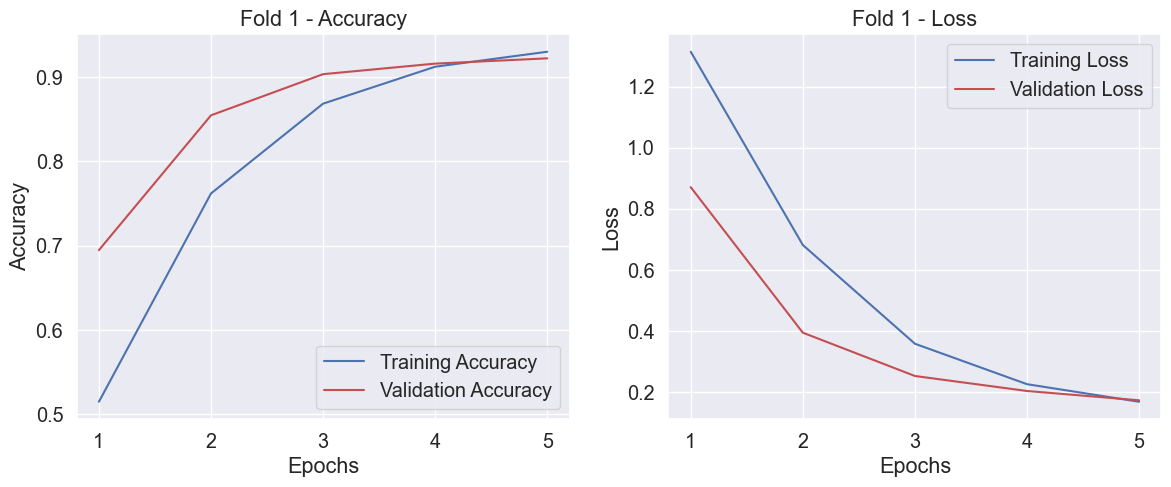

Training fold 2...
Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 508s 10s/step - accuracy: 0.3971 - loss: 1.5145 - val_accuracy: 0.6534 - val_loss: 0.9221
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 538s 11s/step - accuracy: 0.7122 - loss: 0.8109 - val_accuracy: 0.8547 - val_loss: 0.4050
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 560s 11s/step - accuracy: 0.8618 - loss: 0.3854 - val_accuracy: 0.8976 - val_loss: 0.2686
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 565s 11s/step - accuracy: 0.9153 - loss: 0.2284 - val_accuracy: 0.9145 - val_loss: 0.2012
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 579s 12s/step - accuracy: 0.9348 - loss: 0.1581 - val_accuracy: 0.9195 - val_loss: 0.1781


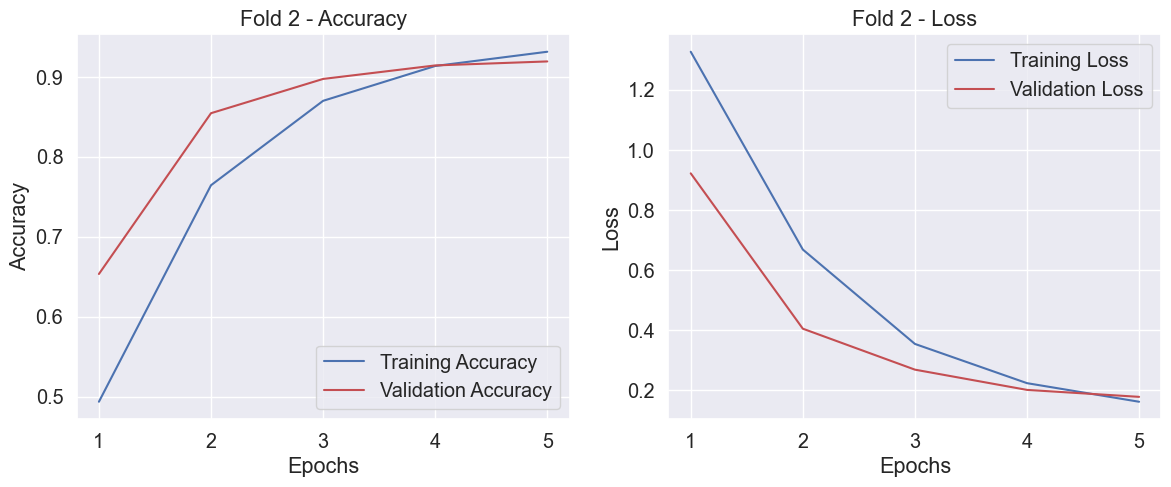

Training fold 3...
Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 561s 11s/step - accuracy: 0.3757 - loss: 1.5656 - val_accuracy: 0.6875 - val_loss: 0.9094
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 568s 11s/step - accuracy: 0.7082 - loss: 0.8308 - val_accuracy: 0.8372 - val_loss: 0.4556
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 602s 12s/step - accuracy: 0.8470 - loss: 0.4413 - val_accuracy: 0.8979 - val_loss: 0.2767
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 610s 12s/step - accuracy: 0.9016 - loss: 0.2685 - val_accuracy: 0.9139 - val_loss: 0.2249
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 618s 12s/step - accuracy: 0.9256 - loss: 0.1828 - val_accuracy: 0.9173 - val_loss: 0.1943


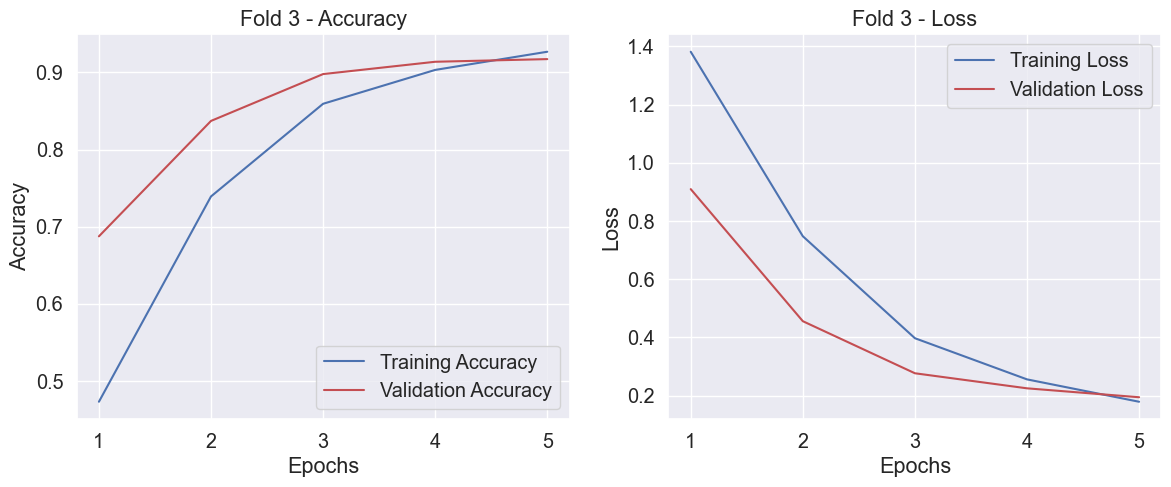

Training fold 4...
Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 631s 12s/step - accuracy: 0.3647 - loss: 1.5718 - val_accuracy: 0.6647 - val_loss: 0.9369
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 537s 11s/step - accuracy: 0.7123 - loss: 0.8147 - val_accuracy: 0.8594 - val_loss: 0.4037
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 549s 11s/step - accuracy: 0.8698 - loss: 0.3666 - val_accuracy: 0.9036 - val_loss: 0.2654
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 559s 11s/step - accuracy: 0.9083 - loss: 0.2314 - val_accuracy: 0.8992 - val_loss: 0.2450
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 564s 11s/step - accuracy: 0.9307 - loss: 0.1653 - val_accuracy: 0.9117 - val_loss: 0.1834


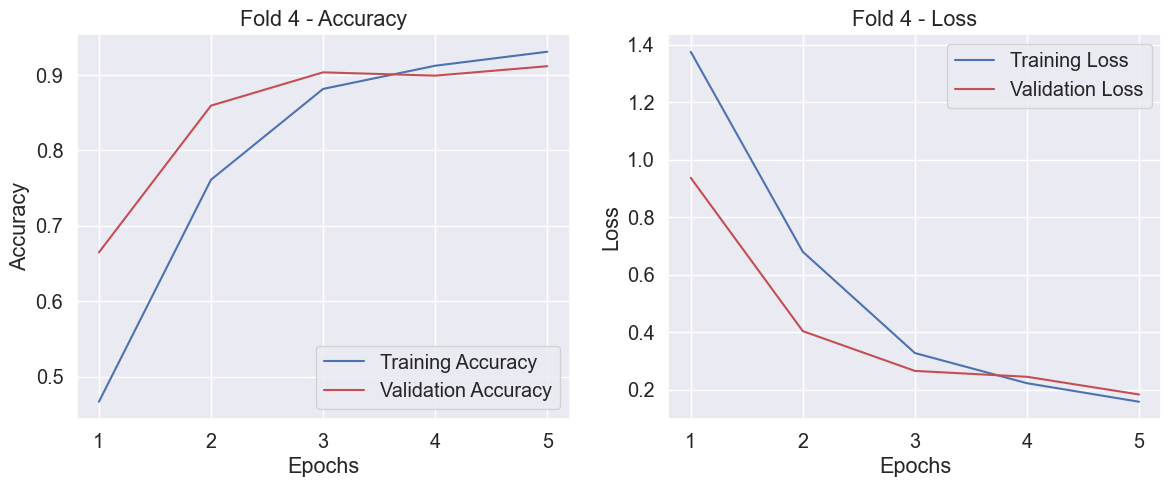

Training fold 5...
Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 625s 12s/step - accuracy: 0.3990 - loss: 1.4927 - val_accuracy: 0.7203 - val_loss: 0.8026
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 567s 11s/step - accuracy: 0.7539 - loss: 0.7072 - val_accuracy: 0.8644 - val_loss: 0.3823
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 556s 11s/step - accuracy: 0.8798 - loss: 0.3266 - val_accuracy: 0.9010 - val_loss: 0.2661
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 563s 11s/step - accuracy: 0.9181 - loss: 0.2133 - val_accuracy: 0.9136 - val_loss: 0.2032
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 558s 11s/step - accuracy: 0.9355 - loss: 0.1591 - val_accuracy: 0.9220 - val_loss: 0.1762


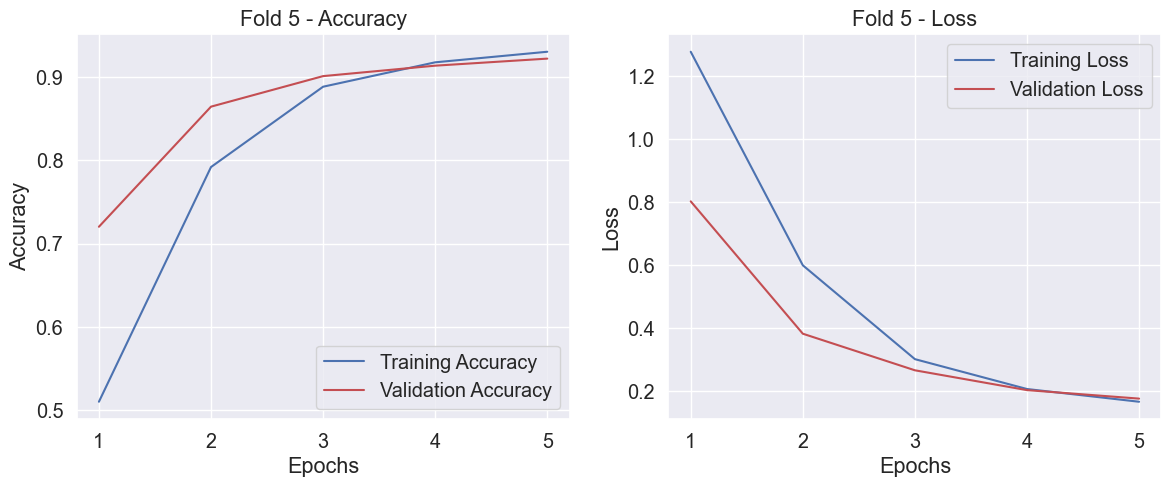

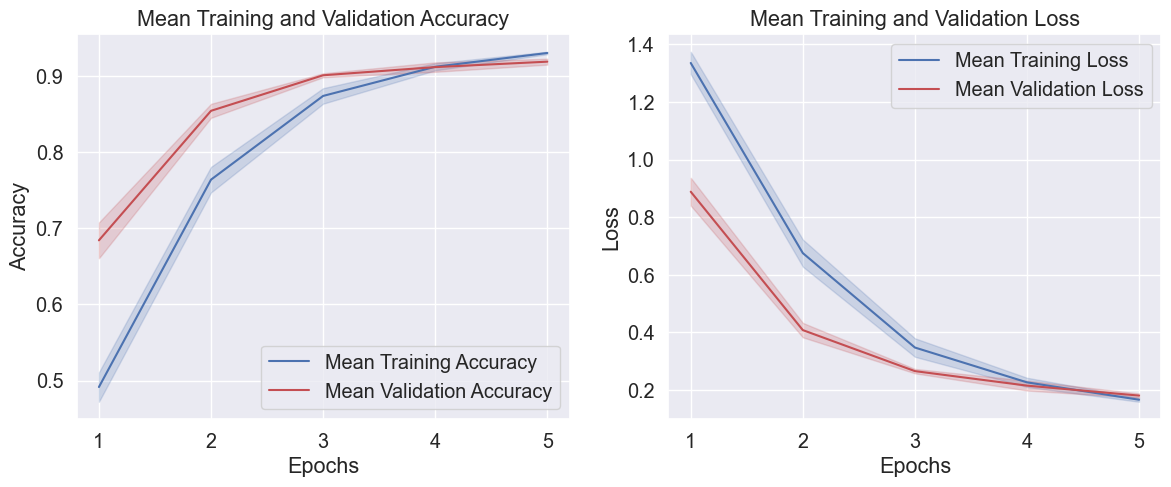

In [38]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

n_folds = 5
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
all_train_acc = []
all_val_acc = []
all_train_loss = []
all_val_loss = []

fold_no = 1
for train_index, val_index in kf.split(X_train):
    print(f'Training fold {fold_no}...')

    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    model = Sequential()
    model.add(Embedding(vocabSize, 200, input_length=X_train.shape[1], weights=[embedding_matrix], trainable=False))
    model.add(Bidirectional(LSTM(256, dropout=0.2, recurrent_dropout=0.2, return_sequences=True)))
    model.add(Bidirectional(LSTM(128, dropout=0.2, recurrent_dropout=0.2, return_sequences=True)))
    model.add(Bidirectional(LSTM(128, dropout=0.2, recurrent_dropout=0.2)))
    model.add(Dense(6, activation='softmax'))

    adam = Adam(learning_rate=0.005)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

    callback = EarlyStopping(
        monitor="val_loss",
        patience=4,
        restore_best_weights=True,
    )

    history = model.fit(X_train_fold,
                        y_train_fold,
                        validation_data=(X_val_fold, y_val_fold),
                        verbose=1,
                        batch_size=256,
                        epochs=5,
                        callbacks=[callback]
                       )

    # Append each fold's history
    all_train_acc.append(history.history['accuracy'])
    all_val_acc.append(history.history['val_accuracy'])
    all_train_loss.append(history.history['loss'])
    all_val_loss.append(history.history['val_loss'])

    # Plot results for the current fold
    epochs = range(1, len(history.history['accuracy']) + 1)

    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, history.history['accuracy'], 'b', label='Training Accuracy')
    plt.plot(epochs, history.history['val_accuracy'], 'r', label='Validation Accuracy')
    plt.title(f'Fold {fold_no} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, history.history['loss'], 'b', label='Training Loss')
    plt.plot(epochs, history.history['val_loss'], 'r', label='Validation Loss')
    plt.title(f'Fold {fold_no} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

    fold_no += 1

# After all folds are processed, calculate and plot the mean and std
all_train_acc = np.array(all_train_acc)
all_val_acc = np.array(all_val_acc)
all_train_loss = np.array(all_train_loss)
all_val_loss = np.array(all_val_loss)

mean_train_acc = np.mean(all_train_acc, axis=0)
mean_val_acc = np.mean(all_val_acc, axis=0)
mean_train_loss = np.mean(all_train_loss, axis=0)
mean_val_loss = np.mean(all_val_loss, axis=0)

std_train_acc = np.std(all_train_acc, axis=0)
std_val_acc = np.std(all_val_acc, axis=0)
std_train_loss = np.std(all_train_loss, axis=0)
std_val_loss = np.std(all_val_loss, axis=0)

epochs = range(1, len(mean_train_acc) + 1)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, mean_train_acc, 'b', label='Mean Training Accuracy')
plt.fill_between(epochs, mean_train_acc - std_train_acc, mean_train_acc + std_train_acc, color='b', alpha=0.2)
plt.plot(epochs, mean_val_acc, 'r', label='Mean Validation Accuracy')
plt.fill_between(epochs, mean_val_acc - std_val_acc, mean_val_acc + std_val_acc, color='r', alpha=0.2)
plt.title('Mean Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, mean_train_loss, 'b', label='Mean Training Loss')
plt.fill_between(epochs, mean_train_loss - std_train_loss, mean_train_loss + std_train_loss, color='b', alpha=0.2)
plt.plot(epochs, mean_val_loss, 'r', label='Mean Validation Loss')
plt.fill_between(epochs, mean_val_loss - std_val_loss, mean_val_loss + std_val_loss, color='r', alpha=0.2)
plt.title('Mean Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()





In [174]:
#print the overall loss and accuracy
model.evaluate(X_val, y_val, verbose=1)

63/63 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.9497 - loss: 0.1023


[0.11825095862150192, 0.9399999976158142]

In [175]:
#print the overall loss and accuracy
model.evaluate(X_test, y_test, verbose=1)

63/63 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.9315 - loss: 0.1293


[0.12862864136695862, 0.9319999814033508]

In [198]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

predicted = model.predict(X_test)
y_pred = predicted.argmax(axis=-1)

print(classification_report(le.transform(df_test['Emotion']), y_pred))

cm = confusion_matrix(le.transform(df_test['Emotion']), y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


UnimplementedError: Graph execution error:

Detected at node sequential_6_1/Cast defined at (most recent call last):
  File "C:\Users\Byte\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main

  File "C:\Users\Byte\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code

  File "C:\Users\Byte\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel_launcher.py", line 18, in <module>

  File "C:\Users\Byte\AppData\Local\Programs\Python\Python310\lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance

  File "C:\Users\Byte\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelapp.py", line 739, in start

  File "C:\Users\Byte\AppData\Local\Programs\Python\Python310\lib\site-packages\tornado\platform\asyncio.py", line 215, in start

  File "C:\Users\Byte\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 600, in run_forever

  File "C:\Users\Byte\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 1896, in _run_once

  File "C:\Users\Byte\AppData\Local\Programs\Python\Python310\lib\asyncio\events.py", line 80, in _run

  File "C:\Users\Byte\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 545, in dispatch_queue

  File "C:\Users\Byte\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 534, in process_one

  File "C:\Users\Byte\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell

  File "C:\Users\Byte\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\ipkernel.py", line 362, in execute_request

  File "C:\Users\Byte\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 778, in execute_request

  File "C:\Users\Byte\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\ipkernel.py", line 449, in do_execute

  File "C:\Users\Byte\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "C:\Users\Byte\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3075, in run_cell

  File "C:\Users\Byte\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3130, in _run_cell

  File "C:\Users\Byte\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\async_helpers.py", line 128, in _pseudo_sync_runner

  File "C:\Users\Byte\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3334, in run_cell_async

  File "C:\Users\Byte\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3517, in run_ast_nodes

  File "C:\Users\Byte\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code

  File "C:\Users\Byte\AppData\Local\Temp\ipykernel_9288\2104181479.py", line 5, in <module>

  File "C:\Users\Byte\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\Byte\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 512, in predict

  File "C:\Users\Byte\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 208, in one_step_on_data_distributed

  File "C:\Users\Byte\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 198, in one_step_on_data

  File "C:\Users\Byte\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 96, in predict_step

  File "C:\Users\Byte\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\Byte\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\layer.py", line 901, in __call__

  File "C:\Users\Byte\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\Byte\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\ops\operation.py", line 46, in __call__

  File "C:\Users\Byte\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\utils\traceback_utils.py", line 156, in error_handler

  File "C:\Users\Byte\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\models\sequential.py", line 212, in call

  File "C:\Users\Byte\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\models\functional.py", line 167, in call

  File "C:\Users\Byte\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\models\functional.py", line 258, in _standardize_inputs

  File "C:\Users\Byte\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\models\functional.py", line 218, in _convert_inputs_to_tensors

  File "C:\Users\Byte\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\ops\core.py", line 822, in convert_to_tensor

  File "C:\Users\Byte\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\backend\tensorflow\core.py", line 132, in convert_to_tensor

Cast string to float is not supported
	 [[{{node sequential_6_1/Cast}}]] [Op:__inference_one_step_on_data_distributed_441813]

63/63 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step


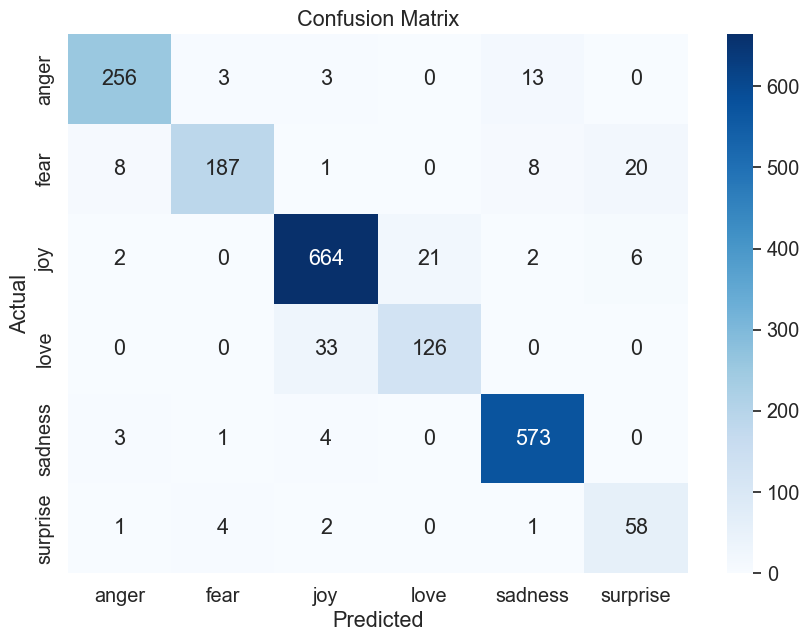

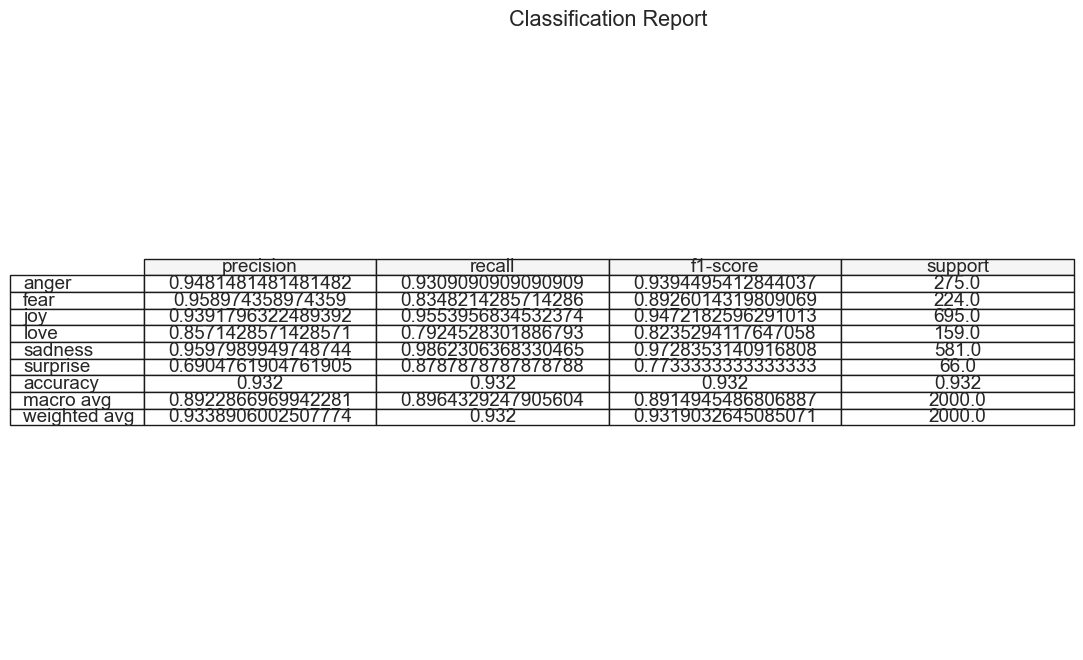


Classification Report:
              precision    recall  f1-score   support
anger          0.948148  0.930909  0.939450   275.000
fear           0.958974  0.834821  0.892601   224.000
joy            0.939180  0.955396  0.947218   695.000
love           0.857143  0.792453  0.823529   159.000
sadness        0.959799  0.986231  0.972835   581.000
surprise       0.690476  0.878788  0.773333    66.000
accuracy       0.932000  0.932000  0.932000     0.932
macro avg      0.892287  0.896433  0.891495  2000.000
weighted avg   0.933891  0.932000  0.931903  2000.000


In [183]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import numpy as np

predicted = model.predict(X_test)
y_pred = predicted.argmax(axis=-1)

true_labels = le.transform(df_test['Emotion'])

report = classification_report(true_labels, y_pred, target_names=le.classes_, output_dict=True)

cm = confusion_matrix(true_labels, y_pred)


report_df = pd.DataFrame(report).transpose()
report_df = report_df.fillna(0)  

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

plt.figure(figsize=(12, 8))
plt.axis('off')  
plt.table(cellText=report_df.values,
          rowLabels=report_df.index,
          colLabels=report_df.columns,
          cellLoc='center',
          loc='center',
          colColours=['#f5f5f5']*len(report_df.columns))

plt.title('Classification Report')
plt.show()

print("\nClassification Report:")
print(report_df.to_string())



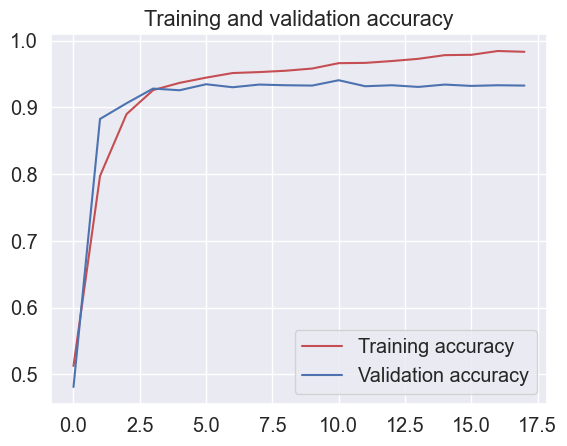

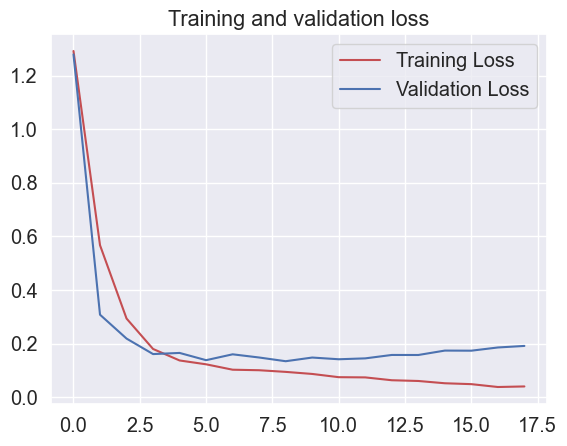

In [191]:
# Visualize Loss & Accuracy

%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [199]:
# Classify custom sample

sentences = ['nah i win!']

for sentence in sentences:
    print(sentence)
    sentence = normalized_sentence(sentence)
    sentence = tokenizer.texts_to_sequences([sentence])
    sentence = pad_sequences(sentence, maxlen=631, truncating='pre')
    result = le.inverse_transform(np.argmax(model.predict(sentence), axis=-1))[0]
    proba =  np.max(model.predict(sentence))
    print(f"{result} : {proba}\n\n")

nah i win!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
joy : 0.4059741497039795




In [197]:
import pandas as pd
import numpy as np
from keras.preprocessing.sequence import pad_sequences

# لود دیتاست
df = pd.read_csv('emotion_dataset_raw.csv')

# انتخاب 30 جمله تصادفی از دیتاست
sample_df = df.sample(n=30, random_state=42)
sentences = sample_df['Text'].tolist()
true_labels = sample_df['Emotion'].tolist()

correct_predictions = 0

for sentence, true_label in zip(sentences, true_labels):
    print(f"Sentence: {sentence}")
    print(f"True Label: {true_label}")
    
    sentence_normalized = normalized_sentence(sentence) 
    sequence = tokenizer.texts_to_sequences([sentence_normalized])
    sequence_padded = pad_sequences(sequence, maxlen=631, truncating='pre')
    
    predicted_label = le.inverse_transform(np.argmax(model.predict(sequence_padded), axis=-1))[0]
    proba = np.max(model.predict(sequence_padded))
    
    if predicted_label == true_label:
        correct_predictions += 1
    
    print(f"Predicted Label: {predicted_label} : {proba:.2f}\n\n")

accuracy = correct_predictions / len(sentences)
print(f"Accuracy: {accuracy:.2f}")



Sentence: Cody won't be coming anywhere NEAR where I live. At all. );
True Label: sadness
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
Predicted Label: anger : 0.42


Sentence: Woah, not annoyed much!  #JustLikeBefore Some people just never change!
True Label: anger
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
Predicted Label: anger : 0.89


Sentence: ` Forgive me , Miss Kyte , " said the other lady softly , ` but you look quite downcast . " 
True Label: sadness
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
Predicted Label: joy : 0.44


Sentence: Great, got a biology ISA this morning 
True Label: joy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
Predicted Label: joy : 0.34


Sentence: People don't even know how blessed u can be when you'ra a medical student -.- .. Nothing EVER goes smoothly  
True Label: anger
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━

In [193]:
model.save('Emotion Recognition From English text.h5')

In [196]:
from tensorflow.keras.models import load_model
model = load_model('Emotion Recognition From English text.h5')

